In [ ]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install plotly
!pip3 install rpy2

import pandas as pa
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
from scipy import stats

In [ ]:
!pip3 install pyqt5

In [ ]:
!pip3 install bioinfokit

In [ ]:
table = pa.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")

In [ ]:
print(table.head(0))

In [ ]:
# extract names column
genes = table.iloc[:, 0]

#calculate averages of each row
gene_avg = table.iloc[:, 2:].mean(axis=1)

#create new table
avg_table = pa.DataFrame({'Genes':genes, 'Averages':gene_avg})
avg_table

In [ ]:
# find range
gene_min = table.iloc[:, 2:].min(axis=1)
gene_max = table.iloc[:, 2:].max(axis=1)
gene_range = gene_max - gene_min

# create new table
range_table = pa.DataFrame({'Genes':genes, 'Range':gene_range})
range_table

In [ ]:
# identify columns based sample type
oh_cols = table.filter(regex=r'^old_human').columns
oo_cols = table.filter(regex=r'^old_organoid').columns
yh_cols = table.filter(regex=r'^young_human').columns
yo_cols = table.filter(regex=r'^young_organoid').columns

# get averages of each gene of each sample
oh_avg = table[oh_cols].mean(axis=1)
oo_avg = table[oo_cols].mean(axis=1)
yh_avg = table[yh_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

# put into data frame
better_avg_table = pa.DataFrame({
    'Gene':genes,
    'Old Human':oh_avg,
    'Old Organoid':oo_avg,
    'Young Human':yh_avg,
    'Young Organoid':yo_avg
})

better_avg_table

In [ ]:
better_avg_table

In [ ]:
# old human range
oh_min = table[oh_cols].min(axis=1)
oh_max = table[oh_cols].max(axis=1)
oh_range = oh_max - oh_min

# old organoid range
oo_min = table[oo_cols].min(axis=1)
oo_max = table[oo_cols].max(axis=1)
oo_range = oo_max - oo_min

# young human range
yh_min = table[yh_cols].min(axis=1)
yh_max = table[yh_cols].max(axis=1)
yh_range = yh_max - yh_min

# young organoid range
yo_min = table[yo_cols].min(axis=1)
yo_max = table[yo_cols].max(axis=1)
yo_range = yo_max - yo_min

# put into data frame
better_range_table = pa.DataFrame({'Gene':genes, 'Old Human':oh_range, 'Old Organoid':oo_range, 'Young Human':yh_range, 'Young Organoid':yo_range})
better_range_table.to_csv("data.csv")

In [ ]:
# remove gene name columns so they don't interfere with PCA
table = table.drop(columns=['gene_name', 'gene_id'])

In [ ]:
pca = PCA()

# find line of least regression
pca.fit(table.T)

# make x-y coords
transformed_data = pca.transform(table.T)
transformed_table = pa.DataFrame(data=transformed_data, columns=['PC{}'.format(i+1) for i in range(transformed_data.shape[1])])

transformed_table = transformed_table.set_index(table.columns)

transformed_table

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# make a scatter table
scatter_table = go.Scatter(
    x = transformed_table[transformed_table.columns[6]],
    y = transformed_table[transformed_table.columns[7]],
    text = transformed_table.index,
    mode = 'markers'
)

# 
layout = go.Layout(
    xaxis=dict(title=transformed_table.columns[6]),
    yaxis=dict(title=transformed_table.columns[7]),
    hovermode='closest'
)

figure = go.Figure(data=[scatter_table], layout=layout)

pyo.plot(figure, filename='scatter_plot.html')

In [36]:
import matplotlib.pyplot as plt
import pandas as pa
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
from bioinfokit import analys, visuz
import math


# extract names column
table = pa.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")
genes = table.iloc[:, 0]

# identify columns based sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns


# get averages of each gene of each sample
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

#sort heat data
heat_data = {
    'Old Organoid':oo_avg,
    'Metformin Treatment':tm_avg,
    'NMN Treatment':tn_avg,
    'Resveratrol Treatment':tr_avg,
    'Young Organoid':yo_avg
}

# put into data frame
heat_table = pa.DataFrame(heat_data)
heat_table.index = genes
num_genes_left = 500
heat_table = heat_table.head(num_genes_left)
#heat_table

heat_table =(np.log10(heat_table))

# Calculate the standard deviation of each row
row_std = heat_table.apply(np.std, axis=1)

# Set a threshold for the minimum standard deviation
threshold = 0.033

# Filter out rows with standard deviation below the threshold
filtered_heat_table = heat_table[row_std <= threshold]

# Get the indices of the filtered rows
filtered_indices = filtered_heat_table.index

# Remove the filtered rows from the original heat_table
heat_table = heat_table.drop(filtered_indices)

# heatmap with hierarchical clustering 
#visuz.gene_exp.hmap(df=heat_table, dim=(3, 6), tickfont=(6, 4))

print(heat_table.shape[0])

# heatmap without hierarchical clustering 
#visuz.gene_exp.hmap(df=heat_table, rowclus=False, colclus=False, dim=(10, 20), tickfont=(9, 8), show=True)


489


/Users/jonahdiamond/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
oo_data = heat_table.columns['Old Organoid']
tm_data = heat_table.columns['Metformin Treatment']
tn_data = heat_table.columns['NMN Treatment']
tr_data = heat_table.columns['Resveratrol Treatment']
yo_data = heat_table.columns['Young Organoid']


In [ ]:
# Define the width and height of the figure
fig_width = 120
fig_height = 12

# Create a new figure with the specified size
plt.figure(figsize=(fig_width, fig_height))

# Get the column names from heat_table
column_names = heat_table.columns

# Plot line graphs for each column
for column in column_names:
    plt.plot(heat_table.index, heat_table[column], label=column)

# Set plot title and labels
plt.title('Column Comparison')
plt.xlabel('Row')
plt.ylabel('Value')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import seaborn as sns

# Generate the scatter plot matrix
sns.pairplot(heat_table)

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = heat_table.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates

# Create a copy of the heat_table DataFrame
normalized_heat_table = heat_table.copy()

# Normalize the values in the DataFrame to a common scale
normalized_heat_table = (normalized_heat_table - normalized_heat_table.min()) / (normalized_heat_table.max() - normalized_heat_table.min())

# Add a target column for coloring the lines (optional)
normalized_heat_table['target'] = range(len(normalized_heat_table))

# Create the parallel coordinates plot
parallel_coordinates(normalized_heat_table, 'target', colormap='coolwarm')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of scatter plots
sns.pairplot(heat_table, diag_kind='kde')

# Show the plot
plt.show()

In [ ]:
plt.plot(heat_table, marker='x')

/Users/jonahdiamond/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


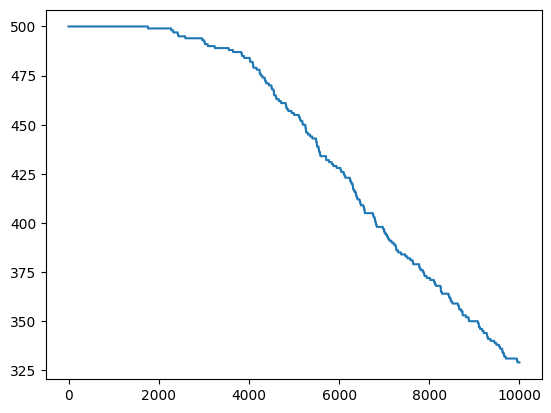

In [37]:
import matplotlib.pyplot as plt
import pandas as pa
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
from bioinfokit import analys, visuz
import math


# extract names column
table = pa.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")
genes = table.iloc[:, 0]

# identify columns based sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns


# get averages of each gene of each sample
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

#sort heat data
heat_data = {
    'Old Organoid':oo_avg,
    'Metformin Treatment':tm_avg,
    'NMN Treatment':tn_avg,
    'Resveratrol Treatment':tr_avg,
    'Young Organoid':yo_avg
}

# put into data frame
heat_table = pa.DataFrame(heat_data)
heat_table.index = genes

heat_table = heat_table.head(num_genes_left)
#heat_table

heat_table =(np.log10(heat_table))

# Calculate the standard deviation of each row
row_std = heat_table.apply(np.std, axis=1)

# Store number of genes left
xlens = []

# Set a threshold for the minimum standard deviation
for threshold in np.arange(0.0, 0.1, 0.00001):

    # Filter out rows with standard deviation below the threshold
    filtered_heat_table = heat_table[row_std <= threshold]
    xlength = num_genes_left - filtered_heat_table.shape[0]
    xlens.append(xlength)

plt.plot(xlens)